# Importing all needed libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
data = pd.read_csv("./Test.csv")

In [40]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [41]:
new_data = data.dropna()

In [42]:
new_data.duplicated().sum()

0

# Checking the outliers

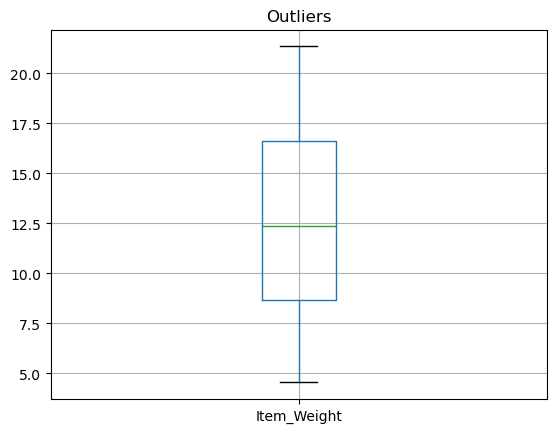

In [43]:
new_data.boxplot(column=["Item_Weight"])
plt.title("Outliers")
plt.show()

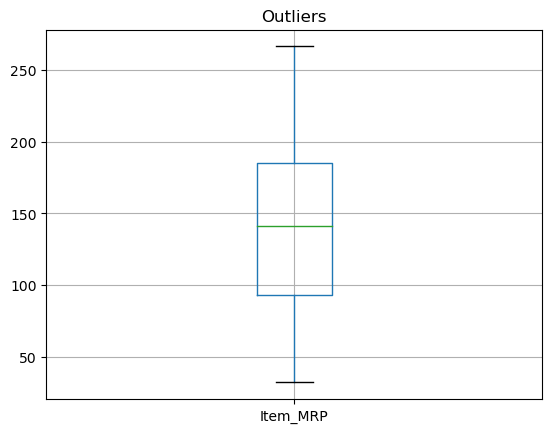

In [44]:
new_data.boxplot(column=["Item_MRP"])
plt.title("Outliers")
plt.show()

# Checking the correlation

In [48]:
data_corr = new_data.corr()
data_corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.017411,0.043260,0.018612
Item_Visibility,-0.017411,1.000000,-0.007232,-0.013425
Item_MRP,0.043260,-0.007232,1.000000,-0.006997
Outlet_Establishment_Year,0.018612,-0.013425,-0.006997,1.000000


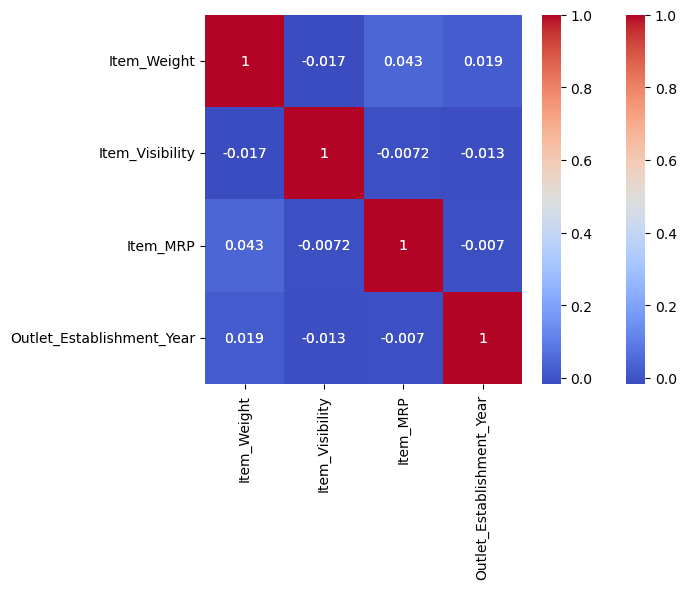

In [51]:
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.show()

In [57]:
new_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

# Changing categorical variables to a numeric values

In [60]:
df_cat = new_data.select_dtypes(np.object)
df_num = new_data.select_dtypes(np.number)

/var/folders/bn/gmt1w38d1tg9v53j2zx4mhj00000gn/T/ipykernel_11767/1169406070.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_cat = new_data.select_dtypes(np.object)


In [64]:
for column in new_data.columns:
    if new_data[column].dtype == 'object':
        new_data[column] = pd.factorize(new_data[column])[0]

/var/folders/bn/gmt1w38d1tg9v53j2zx4mhj00000gn/T/ipykernel_11767/2321460717.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column] = pd.factorize(new_data[column])[0]


# Separating data

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [121]:
train_data = pd.read_csv('Train.csv')

X_train = train_data.drop(['Item_Outlet_Sales'], axis=1)  
y_train = train_data['Item_Outlet_Sales']

test_data = pd.read_csv('Test.csv')

for column in train_data.columns:
    new_data[column] = pd.to_numeric(new_data[column], errors='coerce')

for column in test_data.columns:
    new_data[column] = pd.to_numeric(new_data[column], errors='coerce')

X_test = test_data.drop(['Item_Outlet_Sales'], axis=1)

predictions = model.predict(X_test)

/var/folders/bn/gmt1w38d1tg9v53j2zx4mhj00000gn/T/ipykernel_11767/3267461743.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[column] = pd.to_numeric(new_data[column], errors='coerce')


KeyError: 'Item_Outlet_Sales'

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
